# 딥러닝 온라인 심화반 <Level 6>에 오신 것을 환영합니다!

<Level 6>의 주제는 <U>Multi Layer Perceptron(MLP, 다층 퍼셉트론)</U>입니다. 우리는 퍼셉트론이 가지고 있는 가장 큰 문제들 중 하나인 XOR 문제에 대해 알아보고, MLP의 개념과 예측 및 학습 방법에 대해 배웠습니다. 마지막으로 우편번호 손글씨 이미지(MNIST)를 인식하는 알고리즘을 업그레이드 해보겠습니다.

## Prerequisites

이전과 같이 MNIST 문제를 풀기 위한 환경 설정을 해줍니다. MNIST 필기체 데이터셋이 내장되어 있는 **keras** 라이브러리가 설치되어 있는지 확인해주세요. 또한 **keras**는 **tensorflow** 상에서 구현된 라이브러리이므로(고수준 API라고 함) **tensorflow**가 우선적으로 설치되어 있어야 합니다.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지를 숨길 수 있습니다.

In [2]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
# !pip install tensorflow

In [3]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
# !pip install keras

## MNIST Dataset

이번 과제는 [MNIST 필기체 데이터셋](http://yann.lecun.com/exdb/mnist/)을 활용하여 필기체 이미지를 인식하는 이미지 인식 알고리즘을 **Multi Layer Perceptron**로 작성합니다. 복습 차원에서 퍼셉트론 또는 Single Layer Neural Network을 이용해 MNIST 문제를 해결한 다음, Multi Layer Perceptron으로 이것을 개선해보겠습니다.

**1. MNIST 데이터셋 구성**
> 가로 28px, 세로 28px의 필기체 이미지가 주어지며, 필기체는 숫자 0부터 9까지 총 10개의 Label로 구성되어 있습니다. 이미지는 컬러가 없는 흑백 데이터이며, 한 픽셀의 값은 0 ~ 255입니다. (0일수록 어둡고, 255일수록 밝습니다.)

**2. Train, Test Set**
> 데이터는 60,000개의 Train 데이터와 10,000개의 Test 데이터가 주어지는데, Train 데이터로 Multi-layer Neural Network를 학습한 뒤 Test 데이터로 정확도(accuracy)를 측정합니다. 각 변수의 세부 정보는 다음과 같습니다.

   * **X_train**: **Train 데이터의 Feature**입니다. 가로 28px, 세로 28px, 총 60,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255입니다.
   * **y_train**: **Train 데이터의 Label**입니다. 총 60,000개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.  
   * **X_test**: **Test 데이터의 Feature**입니다. 가로 28px, 세로 28px, 총 10,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255입니다.
   * **y_test**: **Test 데이터의 Label** 입니다. 총 10,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지입니다.


**3. 주의 사항**

  * 이전에 ***XOR data를 풀었던 코드를 조금만 응용***하면 매우 쉽게 MNIST 데이터셋 문제를 풀 수 있습니다.
  * Accuracy가 잘 올라가지 않고 그 이유를 잘 모르겠다면, ***Loss Function(=Cross Entropy)를 병행***해서 사용해보세요. 앞서 언급드린대로 Loss Function은 <U>학습이 잘 될수록 0에 수렴하고, 학습이 잘 되지 않을수록 무한대로 발산합니다.</U> 즉, Loss Function을 사용할 결과가 무한대로 발산하고 있다면 무언가 제대로 풀리지 않고 있다는 것입니다.
  * Loss가 제대로 떨어지지 않는다면 문제는 크게 두 가지입니다. 1) weight의 초기값이 좋지 않거나, 2) learning rate가 너무 높거나 낮아서 생기는 문제입니다. Loss가 떨어지지 않는다면 ***weight의 초기값과 learning rate를 바꿔보세요.***

In [4]:
from keras.datasets import mnist

# 케라스 라이브러리에서 MNIST 데이터셋을 불러옵니다.
# 다소 시간이 걸립니다.
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

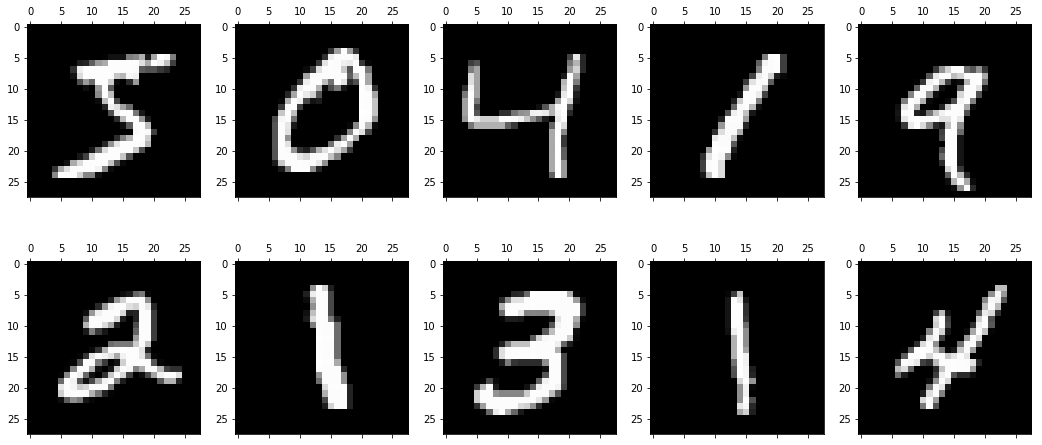

In [5]:
# MNIST 데이터셋을 간략히 살펴보겠습니다.
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray() # 그레이스케일로 만들어줍니다.
figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

 # train set 10개만 보겠습니다.
print(y_train[0:10])

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

### Define Cross Entropy

# Data reshape

In [6]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)
X_train.shape

(60000, 784)

## Solving MNIST problem using Multi-layer Neural Network with Mini Batch and Batch Normalization

Single hidden layer with 1000 nodes with sigmoid activation and Batch Normalization applied.

In [7]:
def ReLU(x, a = 0.1): #make it a leaky one
    x = x * (x > 0) + x * (x <= 0) * a
    return x

def batch_normalize(z, e = 10 ** -12):
    s = z.var(axis = 0, keepdims = True) ## axis = 1 takes variance along datas.
    m = z.mean(axis = 0, keepdims = True) ## becomes (nodes, 1)
    h_norm = (z - m)/(s + e)**(1/2)
    return h_norm, s, m

def sigmoid(x):
    x = 1 / (1 + np.exp(-x))
    return x

def softmax(x):
    x = np.exp(x) / np.exp(x).sum(axis = 1, keepdims = True)
    return x

def dSigmoid(y):
    return (y * (1 - y))

def dReLU(y, a = 0.1):
    return 1 * (y > 0) + (y <= 0) / a

def dSoftmax(y_hat, y):
    return y_hat - y

def dBatch_Norm(h, m, s, h_norm, scale, batch_size, dy, e = 10 ** -12):
    dh_norm = dy * scale
    ds = (dh_norm.T.dot(h - m)*(-0.5)*(s + e) ** (-3/2)).mean(axis = 0, keepdims = True)
    dm = dh_norm * (-(s + e)**(-1/2))
    dh = dh_norm * (s + e) ** (-1/2) + ds * 2 / batch_size * (h - m) + dm / batch_size
#     dh = (dh_norm * (s + e) ** (-1/2)) * (1 - 1 / batch_size) + (dh_norm.T.dot(h - m)*(-0.5)*(s + e) ** (-3/2)).mean(axis = 0, keepdims = True) * 2 / batch_size * (h - m)
    dscale = dh.T.dot(h_norm).mean(axis = 0, keepdims = True)
    dshift = dh.mean(axis = 0, keepdims = True)
    return dh, dscale, dshift

def dLayer(W, z, dh):
    db = dh.mean(axis = 0, keepdims = True)
    dW = z.T.dot(dh)
    dz = dh.dot(W.T)
    return dW, db, dz

In [8]:
dReLU(-1), ReLU(-1) 

(10.0, -0.1)

In [9]:
def onehotencoding(y):
    y = y.reshape((-1, 1))
    i = np.hstack(list(1 * (y == x) for x in range(10)))
    return i

In [10]:
def stepDecay(lr): 
    return(lr/2)

In [11]:
def Momentum_update(M, d, alpha = 0.9):
    M = alpha * M + (1 - alpha) * d
    return M

def RMSprop_update(G, d, beta = 0.9):
    G = beta * G + (1 - beta) * d ** 2
    return G

def Adam_update(M, G, adam_cnt, alpha = 0.9, beta = 0.9, e = 10 ** -12):
    M = M / (1 - alpha ** adam_cnt)
    G = G / (1 - beta ** adam_cnt)
    d = M / (np.sqrt(G) + e)
    return d

def Adam_first_update(M, G, alpha = 0.9, beta = 0.9, e = 10 ** -12):
    d = M / (np.sqrt(G) + e)
    return d

In [12]:
def Adam(gradients, adamcache, adam_cnt, alpha = 0.9, beta = 0.9):
    dW1, dW2, dW3, db1, db2, db3 = gradients['dW1'], gradients['dW2'], gradients['dW3'], gradients['db1'], gradients['db2'] , gradients['db3']
    dscale1, dshift1, dscale2, dshift2 = gradients['dscale1'], gradients['dshift1'], gradients['dscale2'], gradients['dshift2']
    MW1, GW1, Mb1, Gb1 = adamcache['MW1'], adamcache['GW1'], adamcache['Mb1'], adamcache['Gb1']
    MW2, GW2, Mb2, Gb2 = adamcache['MW2'], adamcache['GW2'], adamcache['Mb2'], adamcache['Gb2']
    MW3, GW3, Mb3, Gb3 = adamcache['MW3'], adamcache['GW3'], adamcache['Mb3'], adamcache['Gb3']
    Mscale1, Mscale2, Mshift1, Mshift2 = adamcache['Mscale1'], adamcache['Mscale2'], adamcache['Mshift1'], adamcache['Mshift2']
    Gscale1, Gscale2, Gshift1, Gshift2 = adamcache['Gscale1'], adamcache['Gscale2'], adamcache['Gshift1'], adamcache['Gshift2']
    
    MW1 = Momentum_update(MW1, dW1)
    MW2 = Momentum_update(MW2, dW2)
    MW3 = Momentum_update(MW3, dW3)
    GW1 = RMSprop_update(GW1, dW1)
    GW2 = RMSprop_update(GW2, dW2)
    GW3 = RMSprop_update(GW3, dW3)
    Mb1 = Momentum_update(Mb1, db1)
    Mb2 = Momentum_update(Mb2, db2)
    Mb3 = Momentum_update(Mb3, db3)
    Gb1 = RMSprop_update(Gb1, db1)
    Gb2 = RMSprop_update(Gb2, db2)
    Gb3 = RMSprop_update(Gb3, db3)
    Mscale1 = Momentum_update(Mscale1, dscale1)
    Mscale2 = Momentum_update(Mscale2, dscale2)
    Mshift1 = Momentum_update(Mshift1, dshift1)
    Mshift2 = Momentum_update(Mshift2, dshift2)
    Gscale1 = RMSprop_update(Gscale1, dscale1)
    Gscale2 = RMSprop_update(Gscale2, dscale2)
    Gshift1 = RMSprop_update(Gshift1, dshift1)
    Gshift2 = RMSprop_update(Gshift2, dshift2) 
    
    if adam_cnt > 0:
        dW1 = Adam_update(MW1, GW1, adam_cnt)
        db1 = Adam_update(Mb1, Gb1, adam_cnt)
        dW2 = Adam_update(MW2, GW2, adam_cnt)
        db2 = Adam_update(Mb2, Gb2, adam_cnt)
        dW3 = Adam_update(MW3, GW3, adam_cnt)
        db3 = Adam_update(Mb3, Gb3, adam_cnt)
        dscale1 = Adam_update(Mscale1, Gscale1, adam_cnt)
        dscale2 = Adam_update(Mscale2, Gscale2, adam_cnt)
        dshift1 = Adam_update(Mshift1, Gshift1, adam_cnt)
        dshift2 = Adam_update(Mshift2, Gshift2, adam_cnt)
        
    else:
        dW1 = Adam_first_update(MW1, GW1)
        db1 = Adam_first_update(Mb1, Gb1)
        dW2 = Adam_first_update(MW2, GW2)
        db2 = Adam_first_update(Mb2, Gb2)
        dW3 = Adam_first_update(MW3, GW3)
        db3 = Adam_first_update(Mb3, Gb3)
        dscale1 = Adam_first_update(Mscale1, Gscale1)
        dscale2 = Adam_first_update(Mscale2, Gscale2)
        dshift1 = Adam_first_update(Mshift1, Gshift1)
        dshift2 = Adam_first_update(Mshift2, Gshift2)
    
    gradients['dW3'] = dW3
    gradients['db3'] = db3
    gradients['dW2'] = dW2
    gradients['db2'] = db2
    gradients['dW1'] = dW1
    gradients['db1'] = db1
    gradients['dscale1'] = dscale1
    gradients['dshift1'] = dshift1
    gradients['dscale2'] = dscale2
    gradients['dshift2'] = dshift2
    
    adamcache = {'MW1': MW1, 'GW1': GW1, 'Mb1': Mb1, 'Gb1': Gb1, 'MW2' : MW2, 'GW2' : GW2, 'Mb2': Mb2, 'Gb2' : Gb2, 'MW3' : MW3, 'Mb3' : Mb3, 'GW3' : GW3, 'Gb3' : Gb3, 'Mscale1':Mscale1, 'Mscale2':Mscale2, 'Mshift1':Mshift1, 'Mshift2':Mshift2, 'Gscale1':Gscale1, 'Gscale2':Gscale2, 'Gshift1':Gshift1, 'Gshift2':Gshift2}    
    return gradients, adamcache

In [13]:
def forward_propagation(model, X):

    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    shift1, scale1, shift2, scale2 = model['shift1'], model['scale1'], model['shift2'], model['scale2']
    
    h1 = X.dot(W1) + b1
    h1_norm, s1, m1 = batch_normalize(h1)
    y1 = h1_norm * scale1 + shift1
    z1 = sigmoid(y1)
    
    h2 = z1.dot(W2) + b2
    h2_norm, s2, m2 = batch_normalize(h2)
    y2 = h2_norm * scale2 + shift2
    z2 = sigmoid(y2)
    
    h3 = z2.dot(W3) + b3
    y_hat = softmax(h3)

    cache = {'h1': h1, 'z1': z1, 'h2': h2, 'z2': z2, 'h3': h3, 'y_hat': y_hat, 's1' : s1, 's2': s2, 'm1': m1, 'm2':m2, 'h1_norm' : h1_norm, 'h2_norm':h2_norm}

    return y_hat, cache

In [14]:
def back_propagation(model, cache, adamcache, adam_cnt, X, y, batch_size, alpha = 0.9, beta = 0.9, e = 10 ** -12):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    h1, z1, h2, z2, h3, y_hat = cache['h1'], cache['z1'], cache['h2'], cache['z2'], cache['h3'], cache['y_hat']
    s1, s2, m1, m2, h1_norm, h2_norm, scale1, scale2 = cache['s1'], cache['s2'], cache['m1'], cache['m2'], cache['h1_norm'], cache['h2_norm'], model['scale1'], model['scale2']
    ## Fill In Your Code Here ##
    
    dh3 = (y_hat - y)
    dW3, db3, dz2 = dLayer(W3, z2, dh3)
    dy2 = dz2 * dSigmoid(z2)
    dh2, dscale2, dshift2 = dBatch_Norm(h2, m2, s2, h2_norm, scale2, batch_size, dy2)
    dW2, db2, dz1 = dLayer(W2, z1, dh2)
    dy1 = dz1 * dSigmoid(z1)
    dh1, dscale1, dshift1 = dBatch_Norm(h1, m1, s1, h1_norm, scale1, batch_size, dy1)
    db1 = dh1.mean(axis = 0, keepdims = True)
    dW1 = X.T.dot(dh1)

    gradients = dict()
    gradients['dW3'] = dW3
    gradients['db3'] = db3
    gradients['dscale2'] = dscale2
    gradients['dshift2'] = dshift2
    gradients['dW2'] = dW2
    gradients['db2'] = db2
    gradients['dscale1'] = dscale1
    gradients['dshift1'] = dshift1
    gradients['dW1'] = dW1
    gradients['db1'] = db1
    
#     print('pre Adam')
#     for key in gradients.keys():
#         print(key)
#         print(gradients[key])
#         print('---------------' * 10)
        
    gradients, adamcache = Adam(gradients, adamcache, adam_cnt, alpha, beta)
    
#     print('post Adam')
#     for key in gradients.keys():
#         print(key)
#         print(gradients[key])
#         print('---------------' * 10)
        
    return gradients, adamcache

In [15]:
def compute_loss(model, X, y, e = 10 ** -12):
    y_hat, _ = forward_propagation(model, X)
    total_loss = - np.sum(y * np.log(y_hat + e))
    return total_loss

In [16]:
def predict(model, X):
    y_hat, _ = forward_propagation(model, X)
    prediction = np.argmax(y_hat, axis = 1)
    return prediction

In [17]:
def randn_initialization(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim):
    W1 = np.random.randn(nn_input_dim, nn_hdim1)
    b1 = np.zeros((1, nn_hdim1))
    W2 = np.random.randn(nn_hdim1, nn_hdim2)
    b2 = np.zeros((1, nn_hdim2))
    W3 = np.random.randn(nn_hdim2, nn_output_dim)
    b3 = np.zeros((1, nn_output_dim))
    shift1 = np.zeros((1, nn_hdim1))
    shift2 = np.zeros((1, nn_hdim2))
    scale1 = np.random.randn(1, nn_hdim1)
    scale2 = np.random.randn(1, nn_hdim2)

    return W1, b1, W2, b2, W3, b3, shift1, scale1, shift2, scale2


def const_initialization(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim):
    # Constant initialization. why problematic? - same features.
    W1 = np.ones((nn_input_dim, nn_hdim1))
    b1 = np.zeros((1, nn_hdim1))
    W2 = np.ones((nn_hdim1, nn_hdim2))
    b2 = np.zeros((1, nn_hdim2))
    W3 = np.ones((nn_hdim2, nn_output_dim))
    b3 = np.zeros((1, nn_output_dim))

    return W1, b1, W2, b2, W3, b3

def adam_initialization(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim):
    MW1 = np.zeros((nn_input_dim, nn_hdim1))
    MW2 = np.zeros((nn_hdim1, nn_hdim2))
    MW3 = np.zeros((nn_hdim2, nn_output_dim))
    Mb1 = np.zeros((1, nn_hdim1))
    Mb2 = np.zeros((1, nn_hdim2))
    Mb3 = np.zeros((1, nn_output_dim))
    GW1 = np.zeros((nn_input_dim, nn_hdim1))
    GW2 = np.zeros((nn_hdim1, nn_hdim2))
    GW3 = np.zeros((nn_hdim2, nn_output_dim))
    Gb1 = np.zeros((1, nn_hdim1))
    Gb2 = np.zeros((1, nn_hdim2))
    Gb3 = np.zeros((1, nn_output_dim))
    Mscale1 = np.zeros((1, nn_hdim1))
    Mscale2 = np.zeros((1, nn_hdim2))
    Mshift1 = np.zeros((1, nn_hdim1))
    Mshift2 = np.zeros((1, nn_hdim2))
    Gscale1 = np.zeros((1, nn_hdim1))
    Gscale2 = np.zeros((1, nn_hdim2))
    Gshift1 = np.zeros((1, nn_hdim1))
    Gshift2 = np.zeros((1, nn_hdim2))
    
    return MW1, MW2, MW3, Mb1, Mb2, Mb3, GW1, GW2, GW3, Gb1, Gb2, Gb3, Mscale1, Mscale2, Mshift1, Mshift2, Gscale1, Gscale2, Gshift1, Gshift2

In [21]:
def build_model(X_train, y_train, X_validate, y_validate, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim,
                lr=0.001, epoch=50000, batch_size = 20, print_loss=False, init_type='randn', bias_correction=True, alpha = 0.9, beta = 0.9):

    # Initialization
    np.random.seed(0)
    if init_type == 'randn':
        W1, b1, W2, b2, W3, b3, shift1, scale1, shift2, scale2 = randn_initialization(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim)
    elif init_type == 'const':
        W1, b1, W2, b2, W3, b3 = const_initialization(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim)
    
    MW1, MW2, MW3, Mb1, Mb2, Mb3, GW1, GW2, GW3, Gb1, Gb2, Gb3, Mscale1, Mscale2, Mshift1, Mshift2, Gscale1, Gscale2, Gshift1, Gshift2 = adam_initialization(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim)
    
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3, 'shift1':shift1, 'shift2':shift2, 'scale1':scale1, 'scale2':scale2}
    adamcache = {'MW1': MW1, 'GW1': GW1, 'Mb1': Mb1, 'Gb1': Gb1, 'MW2' : MW2, 'GW2' : GW2, 'Mb2': Mb2, 'Gb2' : Gb2, 'MW3' : MW3, 'Mb3' : Mb3, 'GW3' : GW3, 'Gb3' : Gb3, 'Mscale1':Mscale1, 'Mscale2':Mscale2, 'Mshift1':Mshift1, 'Mshift2':Mshift2, 'Gscale1':Gscale1, 'Gscale2':Gscale2, 'Gshift1':Gshift1, 'Gshift2':Gshift2}
    
    training_loss = []
    validation_loss = []
    true_train = y_train.copy()
    true_validate = y_validate.copy()
    y_validate = onehotencoding(y_validate)
    y_train = onehotencoding(y_train)
    batch_count = int(y_train.shape[0] / batch_size)
    decay_cnt = 1
    decay_stat = 0
    v_loss_best = 1
    model_best = dict()
    # cache = dict()
    # Full batch gradient descent.
    adam_cnt = 0
    for i in range(epoch):
        for sample_run in range(batch_count):
            X = X_train[sample_run * batch_size : (sample_run + 1) * batch_size, :]
            y = y_train[sample_run * batch_size : (sample_run + 1) * batch_size, :]

            # Forward propagation
            y_hat, cache = forward_propagation(model, X)

            # Backpropagation
            gradients, adamcache = back_propagation(model, cache, adamcache, adam_cnt, X, y, batch_size, alpha, beta)
            adam_cnt += 1
            # Parameter update

            W1 -= lr * gradients['dW1']
            b1 -= lr * gradients['db1']
            W2 -= lr * gradients['dW2']
            b2 -= lr * gradients['db2']
            W3 -= lr * gradients['dW3']
            b3 -= lr * gradients['db3']
            shift1 -= lr * gradients['dshift1']
            shift2 -= lr * gradients['dshift2']
            scale1 -= lr * gradients['dscale1']
            scale2 -= lr * gradients['dscale2']

            # Assign new parameters
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3, 'shift1':shift1, 'shift2':shift2, 'scale1':scale1, 'scale2':scale2}
        t_loss = compute_loss(model, X_train, y_train)
        training_loss.append(t_loss)
        v_loss = compute_loss(model, X_validate, y_validate)
        validation_loss.append(v_loss)
        print(f'iteration {i} - t_loss: {t_loss}, v_loss: {v_loss}')
        y_predict = predict(model, X_train)
        accuracy = np.equal(y_predict, true_train).mean()
        print(f'Train Accuracy: {accuracy}')
        if v_loss_best > v_loss:
            v_loss_best = v_loss
            model_best = model.copy()
            
        if i > 10 and abs(validation_loss[-1] - validation_loss[-2]) / validation_loss[-1] < 0.01:
            decay_stat += 1
            if decay_stat % 5 == 0:
                print(f'{decay_cnt}th step decay')
                decay_cnt += 1
                lr = stepDecay(lr)
                decay_stat = 0
        if np.isnan(t_loss) or np.isnan(v_loss):
            for key in model.keys():
                print(key)
                print(model[key])
                print('----------------'*10)
            return model, training_loss
        
        for key in model.keys():
            if np.any(np.isnan(model[key])) or np.any(np.isinf(model[key])): 
                for key in model.keys():
                    print(key)
                    print(model[key])
                    print('----------------'*10)
                return model, training_loss
        
        if i > 2 and (abs(validation_loss[-2] - validation_loss[-1]) / validation_loss[-1] < 10 ** (-6) or accuracy > 0.9999):
            break

    return model, model_best, training_loss, validation_loss


# Evaluate (Train)

In [22]:
a = np.array([1,2,3,0.5,0.2, np.nan,50])
print(np.any(np.isnan(a)))

True


In [23]:
nn_input_dim = 28*28
nn_hdim1 = 1000
nn_hdim2 = 100
nn_output_dim = 10
lr = 0.01
epoch = 5000
batch_size = 32
print_loss= True
init_type= 'randn'
bias_correction = True

model, model_best, training_loss, validation_loss = build_model(X_train[:56000], y_train[:56000], X_train[56000:], y_train[56000:], nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim,
                lr, epoch, batch_size, print_loss, init_type, bias_correction)

iteration 0 - t_loss: 14453.400485605274, v_loss: 850.2784623199166
Train Accuracy: 0.9213214285714286
iteration 1 - t_loss: 11720.374204129124, v_loss: 678.4504525331454
Train Accuracy: 0.9353035714285715
iteration 2 - t_loss: 11181.589194746137, v_loss: 664.3048513357935
Train Accuracy: 0.9377142857142857
iteration 3 - t_loss: 14007.738567972405, v_loss: 787.3943482277673
Train Accuracy: 0.9261607142857143
iteration 4 - t_loss: 10249.050717905826, v_loss: 601.6179509715581
Train Accuracy: 0.9440178571428571
iteration 5 - t_loss: 13128.498785467602, v_loss: 785.4486398822474
Train Accuracy: 0.9288928571428572
iteration 6 - t_loss: 9636.345051870176, v_loss: 608.525819185265
Train Accuracy: 0.9482142857142857
iteration 7 - t_loss: 7246.984471976075, v_loss: 551.399744918954
Train Accuracy: 0.960375
iteration 8 - t_loss: 6277.448859155679, v_loss: 539.7741841123561
Train Accuracy: 0.9660357142857143
iteration 9 - t_loss: 6762.943726301962, v_loss: 600.253266446668
Train Accuracy: 0.9653

Train Accuracy: 0.9836785714285714
iteration 81 - t_loss: 5419.18739594028, v_loss: 934.690195233924
Train Accuracy: 0.9836785714285714
iteration 82 - t_loss: 5699.282087057901, v_loss: 940.2378256077947
Train Accuracy: 0.9832321428571429
iteration 83 - t_loss: 5557.733040566623, v_loss: 939.7204157426156
Train Accuracy: 0.9832857142857143
3th step decay
iteration 84 - t_loss: 5518.7278614432125, v_loss: 939.7077610873637
Train Accuracy: 0.9836785714285714
iteration 85 - t_loss: 5561.676391126071, v_loss: 966.3752603766193
Train Accuracy: 0.9837678571428572
iteration 86 - t_loss: 5638.4419725350635, v_loss: 994.5767542919781
Train Accuracy: 0.9835892857142857
iteration 87 - t_loss: 5712.972654411697, v_loss: 1012.5488133931727
Train Accuracy: 0.9834642857142857
iteration 88 - t_loss: 5773.952188993141, v_loss: 1019.9979173469935
Train Accuracy: 0.9836071428571429
iteration 89 - t_loss: 5842.077530146949, v_loss: 1033.5277284805304
Train Accuracy: 0.9835535714285715
iteration 90 - t_los

Train Accuracy: 0.9822321428571429
iteration 158 - t_loss: 6495.578345009652, v_loss: 1165.7168075809782
Train Accuracy: 0.9822321428571429
iteration 159 - t_loss: 6495.594469692285, v_loss: 1165.7200415056038
Train Accuracy: 0.9822321428571429
iteration 160 - t_loss: 6495.61059522538, v_loss: 1165.7232827530133
Train Accuracy: 0.9822321428571429
iteration 161 - t_loss: 6495.626721668374, v_loss: 1165.7265312501117
Train Accuracy: 0.9822321428571429
16th step decay
iteration 162 - t_loss: 6495.634792374413, v_loss: 1165.7281465948395
Train Accuracy: 0.9822321428571429
iteration 163 - t_loss: 6495.642862991446, v_loss: 1165.7297638722343
Train Accuracy: 0.9822321428571429
iteration 164 - t_loss: 6495.650933800124, v_loss: 1165.7313829869536
Train Accuracy: 0.9822321428571429
iteration 165 - t_loss: 6495.6590048128, v_loss: 1165.7330039300598
Train Accuracy: 0.9822321428571429
iteration 166 - t_loss: 6495.667076038368, v_loss: 1165.7346266925927
Train Accuracy: 0.9822321428571429
17th st

In [1]:
model_best

NameError: name 'model_best' is not defined

In [26]:
y_hat, _ = forward_propagation(model, X_test)
y_predict = y_hat.argmax(axis = 1)
print(np.equal(y_predict, y_test).mean())

0.9635


In [ ]:
# Checking the Train results on the Train Data.
z1 = np.dot(w1, X_train[:, :10000]) + b1 ## shape = (nodes, datas)
s1 = z1.var(axis = 1, keepdims = True) ## axis = 1 takes variance along datas.
m1 = z1.mean(axis = 1, keepdims = True) ## becomes (nodes, 1)
x_normalized = (z1 - m1)/(s1 + eps)**(1/2)
y1 = x_normalized * g + b
a1 = sigmoid(y1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)
y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=0)

# actual vs. predict
train_result = pd.DataFrame({'actual': y_train[:10000], 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
train_accuracy = (train_result["actual"] == train_result["predict"]).mean()
print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

### Evaluate (Test)

In [ ]:
# Applying on the Test Data

# normally, test data's get evaluated 1 by 1, which makes calculating m1 and s1 impossible.
# For this reason, we would get the average and variance of the training dataset and plug it into s1, m1.

# However, for the MNIST, we have large number of test data which we plug in at the same time,
# Thus we take mean and variance of the test dataset.

z1 = np.dot(w1, X_test) + b1 ## shape = (nodes, datas)
s1 = z1.var(axis = 1, keepdims = True) ## axis = 1 takes variance along datas.
m1 = z1.mean(axis = 1, keepdims = True) ## becomes (nodes, 1)
x_normalized = (z1 - m1)/(s1 + eps)**(1/2)
y1 = x_normalized * g + b
a1 = sigmoid(y1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)

y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=0)

# actual vs. predict
test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
test_accuracy = (test_result["actual"] == test_result["predict"]).mean()
print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)